In [1]:
include("../../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using Plots
using DifferentialEquations
using .JuliaMBD
using .JuliaMBD.Diagram

In [7]:
@model test begin
    @parameter begin
        a = 1
    end
    @block begin
        ramp1 = Ramp(slope=a, out=OutPort(:rampout))
        f = TrigonometricFunction(in=InPort(:fin), out=OutPort(:fout))
        d = Derivative(in=InPort(:derivin), dout=OutPort(:derivout))
        out1 = Outport(:out1, in=InPort(:out1in))
        i = Integrator(in=InPort(:integin), sout=OutPort(:integout))
        out2 = Outport(:out2, in=InPort(:out2in))
    end
    @connect begin
        ramp1.out => f.in
        f.out => d.in
        d.out => out1.in
        f.out => i.in
        i.out => out2.in
    end
    @scope begin
        out1.out => output1
        out2.out => output2
    end
end

test (generic function with 1 method)

In [8]:
m = @compile_derivative b = test()

Main.JuliaMBD.ODEModel("Block(test)", var"#35#37"(), var"#38#39"(), var"#40#41"(), var"#42#46"())

In [9]:
JuliaMBD.expr_ofunc_derivative(b)

quote
    function test_ofunc_derivative(var"##589", var"##586"; time = 0, a = 1)
        var"##590" = 0.0
        var"##584" = 0.0
        var"##582" = 1
        begin
            var"##595" = var"##586"
        end
        var"##587" = 0.0
        begin
            var"##597" = var"##589"
        end
        out2in = var"##597"
        var"##592" = out2in
        begin
        end
        out1in = var"##595"
        var"##583" = 0.0
        var"##588" = out1in
        begin
        end
        var"##591" = (nothing, nothing)
        begin
            var"##585" = time
        end
        var"##581" = var"##585"
        begin
            #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:24 =#
            rampout = if var"##581" < var"##583"
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:25 =#
                    var"##584"
                else
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:27 =#
                    

In [10]:
u0 = [0,0]
u1 = [0,0]
# test_sfunc_derivative(0, 0, time=0, a=1, h=0.001)
test_sfunc(0, 0, time=0, a=1, h=0.001)

MethodError: MethodError: no method matching test_sfunc(::Int64, ::Int64; time=0, a=1, h=0.001)
Closest candidates are:
  test_sfunc(::Any, ::Any; time, a, derivative_h) at none:0 got unsupported keyword argument "h"

In [8]:
u0 = [0,0]
u1 = [0,0]
m.sfunc(u0, u1, [1], 0)

BoundsError: BoundsError: attempt to access Tuple{Float64} at index [2]

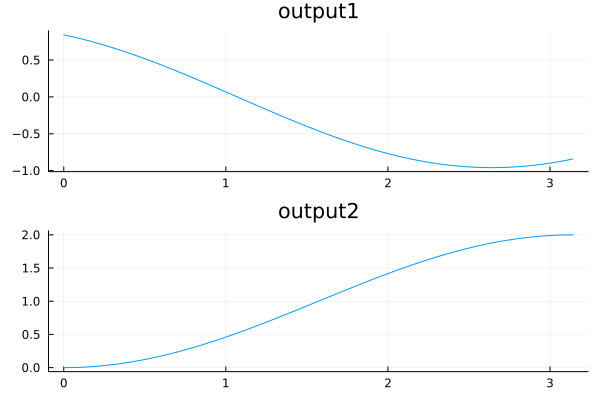

In [11]:
res = simulate(m, tspan=(0,pi))
plot(res)

In [12]:
JuliaMBD.expr_ofunc_derivative(b)

quote
    function test_ofunc_derivative(var"##321"; time = 0, a = 1)
        begin
            var"##320" = time
        end
        var"##316" = var"##320"
        var"##323" = (nothing, nothing)
        var"##317" = 1
        var"##319" = 0.0
        var"##318" = 0.0
        begin
            #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:24 =#
            rampout = if var"##316" < var"##318"
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:25 =#
                    var"##319"
                else
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:27 =#
                    var"##317" * (var"##316" - var"##318") + var"##319"
                end
        end
        begin
            var"##325" = rampout
        end
        fin = var"##325"
        begin
            var"##327" = var"##321"
        end
        out2in = var"##327"
        var"##324" = out2in
        begin
        end
        var"##322" = 0.0
        fout 

In [15]:
eval(JuliaMBD.expr_sfunc_derivative(b))

test_sfunc (generic function with 1 method)

In [16]:
JuliaMBD.expr_ofunc_derivative(b)

quote
    function test_ofunc_derivative(var"##339", var"##337"; time = 0, a = 1)
        var"##334" = 0.0
        begin
            var"##348" = var"##339"
        end
        out2in = var"##348"
        var"##343" = out2in
        begin
        end
        var"##333" = 1
        begin
            var"##336" = time
        end
        begin
            var"##347" = var"##337"
        end
        var"##335" = 0.0
        var"##338" = 0.0
        out1in = var"##347"
        var"##342" = out1in
        begin
        end
        var"##332" = var"##336"
        var"##341" = (nothing, nothing)
        var"##340" = 0.0
        begin
            #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:24 =#
            rampout = if var"##332" < var"##334"
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:25 =#
                    var"##335"
                else
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:27 =#
                    

In [17]:
eval(JuliaMBD.expr_ofunc_derivative(b))

test_ofunc (generic function with 1 method)

In [18]:
JuliaMBD.expr_ifunc_derivative(b)

quote
    function test_ifunc_derivative(; time = 0, a = 1, var"##339" = 0, var"##337" = 0)
        var"##334" = 0.0
        begin
            var"##348" = var"##339"
        end
        out2in = var"##348"
        var"##343" = out2in
        begin
        end
        var"##333" = 1
        begin
            var"##336" = time
        end
        begin
            var"##347" = var"##337"
        end
        var"##335" = 0.0
        var"##338" = 0.0
        out1in = var"##347"
        var"##342" = out1in
        begin
        end
        var"##332" = var"##336"
        var"##341" = (nothing, nothing)
        var"##340" = 0.0
        begin
            #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:24 =#
            rampout = if var"##332" < var"##334"
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:25 =#
                    var"##335"
                else
                    #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:27 =#
          

In [10]:
eval(JuliaMBD.expr_ifunc_derivative(b))

test_ifun (generic function with 1 method)

In [18]:
function vv(t)
    h = 0.001
    d, = test_sfunc_derivative(0, time = t)
    ddash, = test_sfunc_derivative(0, time = t+h)
    test_ofunc_derivative((ddash - d) / h, time = t)
end


vv (generic function with 1 method)

In [25]:
t = range(0, 4, 100)
y = [vv(t)[1] for t = t]

100-element Vector{Float64}:
  0.9999998333333416
  0.9991635047426269
  0.996696277124634
  0.9926021776471977
  0.9868878889631727
  0.9795627383026029
  0.9706386822481983
  0.9601302872190298
  0.9480547056943123
  0.9344316482159942
  ⋮
 -0.8599242429585541
 -0.8386049467068446
 -0.8159168254474602
 -0.7918969121936126
 -0.7665844137945133
 -0.7400206469406756
 -0.7122489707228619
 -0.6833147158601394
 -0.6532651107071796

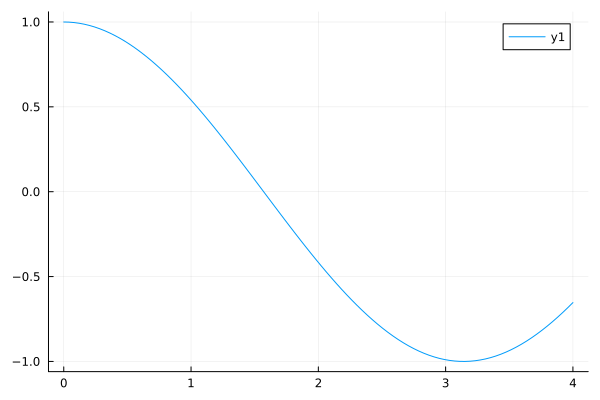

In [26]:
plot(t, y)

In [3]:
@model rlc begin
    @xmlmodel("rlc_deriv.drawio")
    @scope begin
        add.out => out
    end
end

rlc (generic function with 1 method)

In [4]:
m = @compile_derivative rlc()

Main.JuliaMBD.ODEModel("Block(rlc)", var"#15#17"(), var"#18#19"(), var"#20#21"(), var"#22#25"())

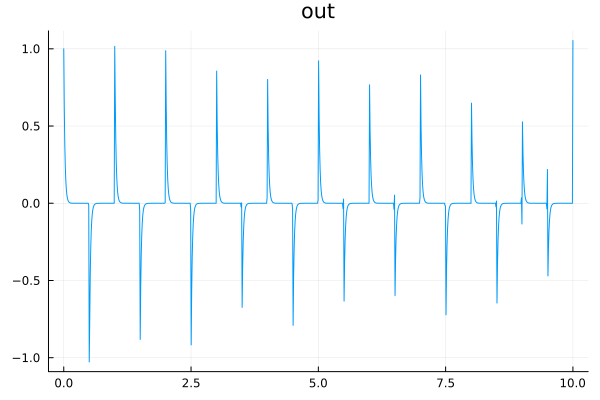

In [6]:
res = simulate(m, tspan=(0,10))
plot(res)